# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

import requests
from api_keys import weather_api_key
import json

# import os
# import csv

from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

In [2]:
#create a list for latitude and longitude
lat_points =[]
long_points =[]

#find array of latitude coordinates
random_lat = np.random.uniform(low=-90.00, high=90.00, size=1400)
#find array of longitude coordinates
random_long = np.random.uniform(low=-180.00, high=180.00, size=1400)
#create coordinate combinations
coordinates = zip(random_lat,random_long)

In [3]:
#create a list for cities to live
unique_cities = []
random_cities = []
#Loop through coordinates to create a list of nearest cities
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #remove the space in between cities with more than 2 names
    #city = city.replace(" ", "20%")
    
    #remove potential repeating cities
    if city not in unique_cities:
        unique_cities.append(city)

## Generate Cities List

In [4]:
len(unique_cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name = []
latitude = []
longitude =[]
temperature_f = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Log file print statement
print(f"Begin Data Retrieval")
print(f"----------------------------------")

for city in unique_cities:
    try:
        query_url = f'q={city}&appid={weather_api_key}&units=imperial'
        #api call for individual cities
        url = base_url + query_url
        weather_data = requests.get(url).json()
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature_f.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        print(f"Processing Record {count} | {city}")
        count += 1
    except KeyError:
        print(f"{city} was not found... Skipping city")
    
    
print(f"----------------------------------")    
print(f"Data Retrieval Complete")
print(f"----------------------------------")
# print(city_name)
# print(latitude)
# print(longitude)
# print(temperature_f)
# print(humidity)
# print(cloudiness)
# print(wind_speed)


Begin Data Retrieval
----------------------------------
Processing Record 1 | avarua
Processing Record 2 | noumea
Processing Record 3 | chuy
barentsburg was not found... Skipping city
Processing Record 4 | vaini
Processing Record 5 | port hardy
Processing Record 6 | kapaa
Processing Record 7 | ambilobe
Processing Record 8 | victoria
Processing Record 9 | coquimbo
Processing Record 10 | marovoay
Processing Record 11 | kloulklubed
Processing Record 12 | vila velha
Processing Record 13 | marzuq
Processing Record 14 | mandurah
Processing Record 15 | hilo
Processing Record 16 | castro
Processing Record 17 | qaanaaq
Processing Record 18 | rikitea
Processing Record 19 | cravo norte
Processing Record 20 | pochutla
Processing Record 21 | alta floresta
Processing Record 22 | hobart
Processing Record 23 | ushuaia
Processing Record 24 | urengoy
Processing Record 25 | atuona
Processing Record 26 | albany
Processing Record 27 | fairbanks
Processing Record 28 | punta arenas
Processing Record 29 | hvi

Processing Record 228 | mangai
Processing Record 229 | fort collins
Processing Record 230 | tasiilaq
Processing Record 231 | kruisfontein
Processing Record 232 | chern
Processing Record 233 | kavieng
Processing Record 234 | hit
Processing Record 235 | sembakung
Processing Record 236 | ararat
Processing Record 237 | kununurra
zlatoustovsk was not found... Skipping city
Processing Record 238 | majene
Processing Record 239 | nishihara
Processing Record 240 | lac du bonnet
Processing Record 241 | la romana
Processing Record 242 | evensk
Processing Record 243 | leningradskiy
Processing Record 244 | hamilton
Processing Record 245 | kivsharivka
attawapiskat was not found... Skipping city
Processing Record 246 | san luis
Processing Record 247 | gharghur
Processing Record 248 | ligayan
kazalinsk was not found... Skipping city
khormuj was not found... Skipping city
Processing Record 249 | mehamn
Processing Record 250 | dibulla
Processing Record 251 | picota
Processing Record 252 | yulara
Process

crab hill was not found... Skipping city
Processing Record 452 | maceio
Processing Record 453 | longkou
Processing Record 454 | quatre cocos
Processing Record 455 | apatity
Processing Record 456 | ponta do sol
Processing Record 457 | nichlaul
Processing Record 458 | rorvik
Processing Record 459 | waingapu
Processing Record 460 | fortuna
doctor pedro p. pena was not found... Skipping city
Processing Record 461 | livingston
karaul was not found... Skipping city
Processing Record 462 | alto araguaia
Processing Record 463 | acarau
Processing Record 464 | katherine
Processing Record 465 | qasigiannguit
Processing Record 466 | dicamay
Processing Record 467 | nanortalik
Processing Record 468 | nexo
Processing Record 469 | afua
Processing Record 470 | springfield
Processing Record 471 | faya
Processing Record 472 | slawno
Processing Record 473 | maltahohe
Processing Record 474 | kapoeta
Processing Record 475 | praia da vitoria
Processing Record 476 | gasa
Processing Record 477 | zhuhai
haibowa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#create a df with all unique cities
data_set = {'cities': city_name,
'lat' : latitude,
'long' : longitude,
'max_fahrenheit' : temperature_f,
'humidity' : humidity,
'cloudiness' : cloudiness,
'wind_speed' : wind_speed,
'country' : country,
'date' : date}
weather_data_df = pd.DataFrame(data_set)
weather_data_df

#export file to csv
weather_data_df.to_csv('weather_data_df')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#check to see if there are any with over 100% humidity
humidity_under_hundred = weather_data_df.loc[weather_data_df['humidity'] > 100]
humidity_under_hundred.count()
#there is none

cities            0
lat               0
long              0
max_fahrenheit    0
humidity          0
cloudiness        0
wind_speed        0
country           0
date              0
dtype: int64

In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature in Fahrenheit')

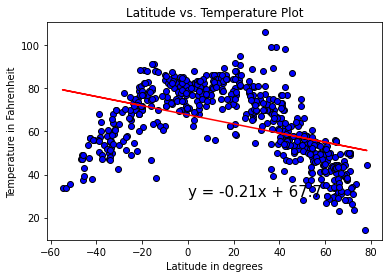

In [27]:
#set the x_axis values to latitude
x_values = weather_data_df["lat"]
y_values = weather_data_df["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


## Latitude vs. Humidity Plot

Text(0, 0.5, 'Percentage of Humidity')

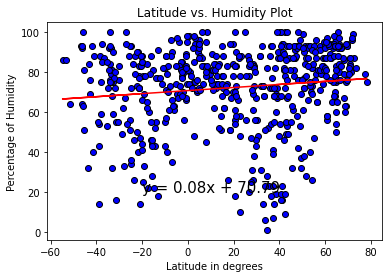

In [28]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Percentage of Cloudiness')

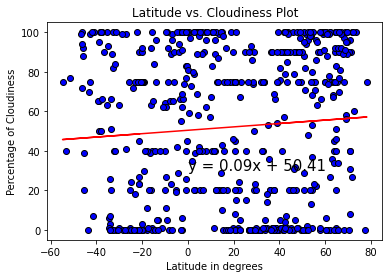

In [29]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

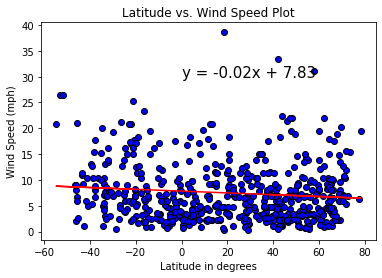

In [30]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [31]:
north_hemisphere = weather_data_df.loc[weather_data_df['lat'] >= 0]
south_hemisphere = weather_data_df.loc[weather_data_df['lat'] < 0]
south_hemisphere

,cities,lat,long,max_fahrenheit,humidity,cloudiness,wind_speed,country,date
0,Avarua,-21.21,-159.78,78.80,78,23,25.28,CK,1601425255
1,Noumea,-22.28,166.46,75.20,50,75,20.80,NC,1601425690
2,Chui,-33.70,-53.46,52.38,79,20,7.14,UY,1601425314
3,Vaini,-21.20,-175.20,80.60,83,90,14.99,TO,1601425692
6,Ambilobe,-13.20,49.05,69.91,91,5,2.33,MG,1601425693
...,...,...,...,...,...,...,...,...,...
542,Kang,-23.68,22.79,54.59,26,0,8.97,BW,1601425972
543,Broken Hill,-31.95,141.43,60.80,72,40,13.87,AU,1601425973
549,Oberá,-27.49,-55.12,70.32,67,0,2.33,AR,1601425876
557,Plettenberg Bay,-34.05,23.37,51.19,75,0,4.23,ZA,1601425981


Text(0, 0.5, 'Temperature in Fahrenheit')

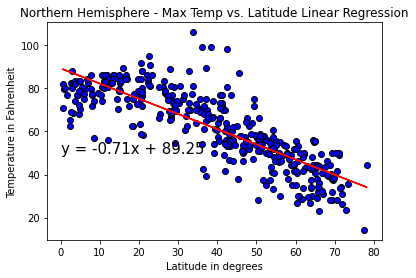

In [32]:
#set the x_axis values to latitude
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature in Fahrenheit')

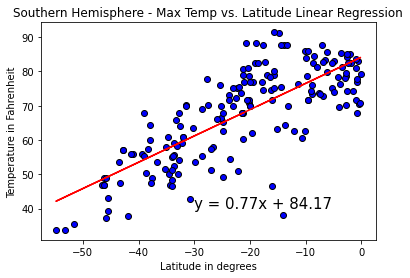

In [33]:
#set the x_axis values to latitude
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

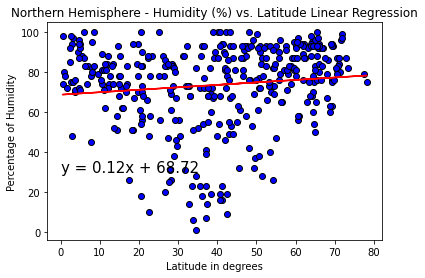

In [34]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

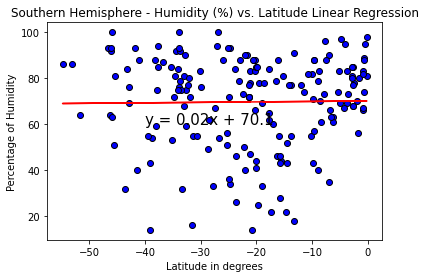

In [35]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

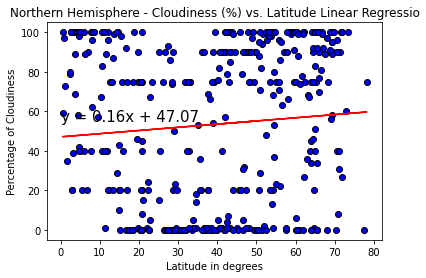

In [36]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,55),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

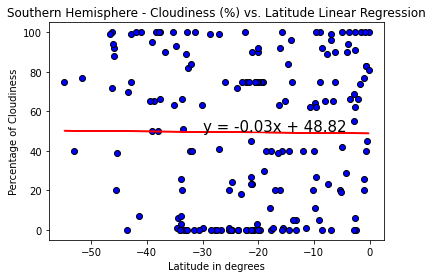

In [37]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

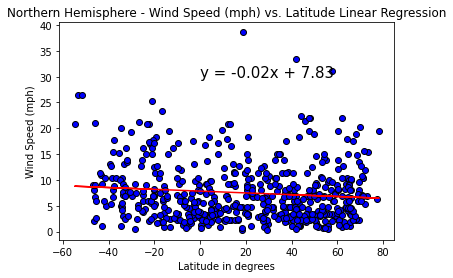

In [38]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

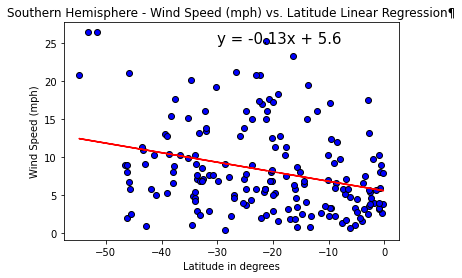

In [39]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")